In [1]:
# Install necessary libraries (if not already installed)
!pip install scikit-learn -q
!pip install seaborn -q

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Generate synthetic dataset
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 60, 100),
    'Salary': np.random.randint(30000, 120000, 100),
    'Experience': np.random.randint(1, 40, 100)
}

In [5]:
# Create a DataFrame
df = pd.DataFrame(data)

In [6]:
# Display dataset
print("Dataset preview:")
print(df.head())

Dataset preview:
   Age  Salary  Experience
0   56   38392           5
1   46   60535          34
2   32  108603           6
3   25   82256          22
4   38  119135          11


In [7]:
# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [8]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

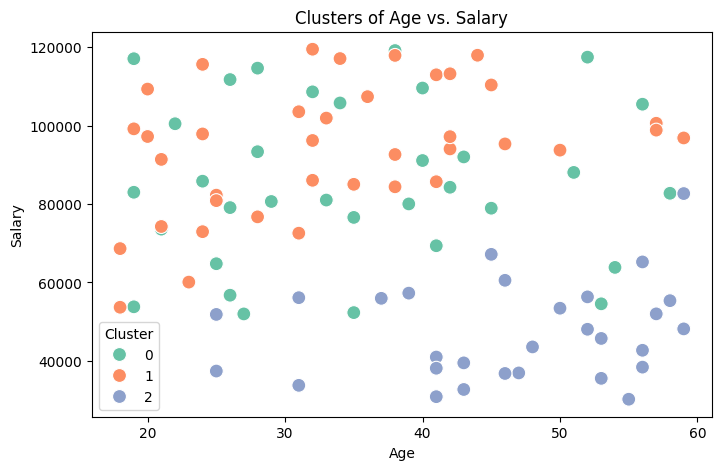

In [9]:
# Visualize clusters using a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Salary'], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Clusters of Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Cluster')
plt.show()

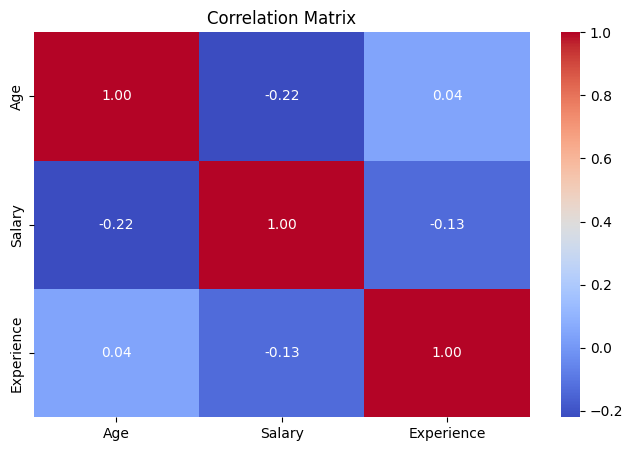

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Age', 'Salary', 'Experience']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
# Train Isolation Forest Model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df[['Age', 'Salary', 'Experience']])


In [13]:
# Count anomalies
print("\n🔹 Anomalies detected:", (df['Anomaly'] == -1).sum())



🔹 Anomalies detected: 5


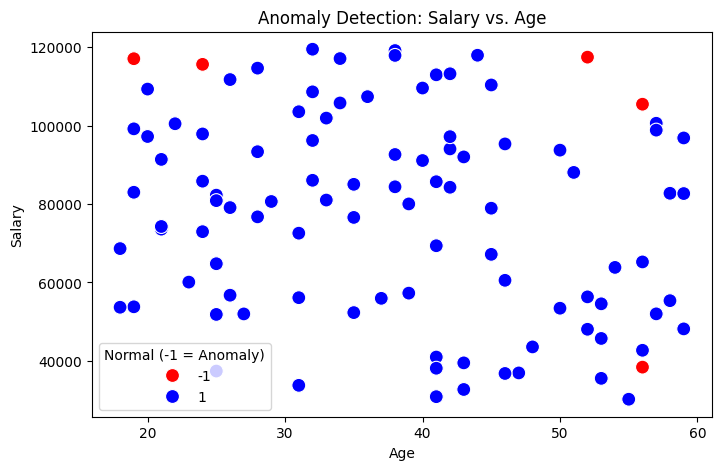

In [14]:
# Visualize Anomalies
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Salary'], hue=df['Anomaly'], palette={1: "blue", -1: "red"}, s=100)
plt.title("Anomaly Detection: Salary vs. Age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(title="Normal (-1 = Anomaly)")
plt.show()

In [15]:
!pip install mlxtend -q
from mlxtend.frequent_patterns import apriori, association_rules



In [17]:
# Convert categorical columns into one-hot encoding
df_encoded = pd.get_dummies(df[['Department', 'Seniority']], prefix=['Dept', 'Sen'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: "None of [Index(['Department', 'Seniority'], dtype='object')] are in the [columns]"

In [18]:
# Recreate 'Department' if missing
if 'Department' not in df.columns:
    df['Department'] = np.random.choice(['HR', 'IT', 'Finance', 'Marketing'], len(df))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
!pip install --upgrade ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.6/821.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.31.0 which is incompatible.


In [21]:
# Feature Engineering: Creating a new column "Seniority Level"
df['Seniority'] = np.where(df['Experience'] > 20, 'Senior', 'Junior')

In [22]:
# Display first 5 rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Age  Salary  Experience  Cluster  Anomaly Department Seniority
0   56   38392           5        2       -1         IT    Junior
1   46   60535          34        2        1         HR    Senior
2   32  108603           6        0        1         IT    Junior
3   25   82256          22        1        1    Finance    Senior
4   38  119135          11        0        1  Marketing    Junior


In [23]:
from scipy.stats import zscore

In [24]:
# Compute Z-scores
df_zscore = df[['Age', 'Salary', 'Experience']].apply(zscore)

In [25]:
# Identify outliers (Z-score > 3)
outliers = (df_zscore > 3).sum()
print("\nOutliers detected (Z-score method):")
print(outliers)


Outliers detected (Z-score method):
Age           0
Salary        0
Experience    0
dtype: int64


In [26]:
# 🔵 Outlier Detection: IQR Method
Q1 = df[['Age', 'Salary', 'Experience']].quantile(0.25)
Q3 = df[['Age', 'Salary', 'Experience']].quantile(0.75)
IQR = Q3 - Q1

In [27]:
# Identify outliers (values outside 1.5 * IQR)
outliers_iqr = ((df[['Age', 'Salary', 'Experience']] < (Q1 - 1.5 * IQR)) |
                (df[['Age', 'Salary', 'Experience']] > (Q3 + 1.5 * IQR))).sum()

print("\nOutliers detected (IQR method):")
print(outliers_iqr)


Outliers detected (IQR method):
Age           0
Salary        0
Experience    0
dtype: int64


In [28]:
# 🟠 Dimensionality Reduction: PCA
# -----------------------------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Salary', 'Experience']])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

df['PCA_1'] = df_pca[:, 0]
df['PCA_2'] = df_pca[:, 1]

NameError: name 'PCA' is not defined

In [29]:
from sklearn.decomposition import PCA

In [31]:
# Assuming 'df' has the necessary columns (Age, Salary, Experience)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Salary', 'Experience']])

In [32]:
# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

In [33]:
# Add PCA components to DataFrame
df['PCA_1'] = df_pca[:, 0]
df['PCA_2'] = df_pca[:, 1]

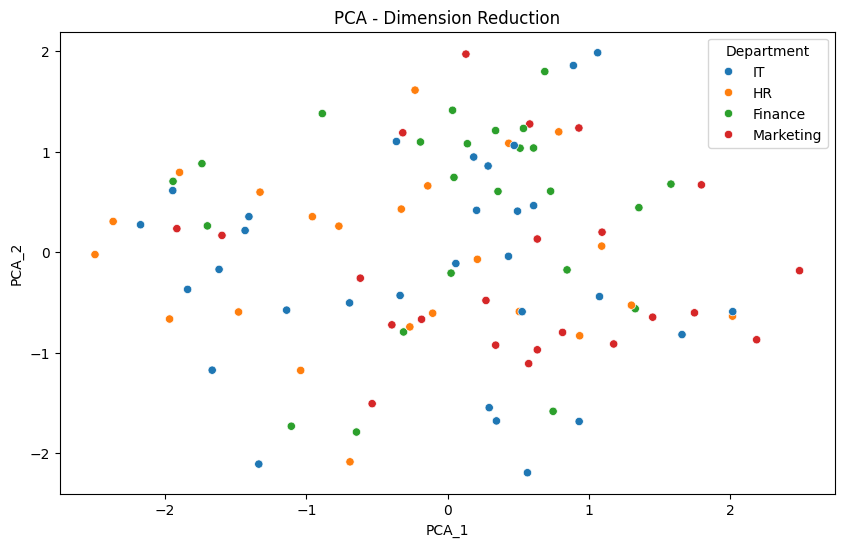

In [34]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', data=df, hue='Department')
plt.title("PCA - Dimension Reduction")
plt.show()

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Salary', 'Experience']])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

df['PCA_1'] = df_pca[:, 0]
df['PCA_2'] = df_pca[:, 1]

In [36]:
# PCA Visualization
fig_pca = px.scatter(df, x='PCA_1', y='PCA_2', color='Department',
                     title='PCA: Dimension Reduction', hover_data=['Age', 'Salary', 'Experience'])
fig_pca.show()

NameError: name 'px' is not defined

In [37]:
# PCA Visualization using Plotly Express
fig_pca = px.scatter(df, x='PCA_1', y='PCA_2', color='Department',
                     title='PCA: Dimension Reduction', hover_data=['Age', 'Salary', 'Experience'])
fig_pca.show()

NameError: name 'px' is not defined

In [38]:
import plotly.express as px

In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Import Plotly Express for interactive plots

In [40]:
# Assuming df has the necessary columns (Age, Salary, Experience)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Salary', 'Experience']])

In [41]:
# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

In [42]:
# Add PCA components to DataFrame
df['PCA_1'] = df_pca[:, 0]
df['PCA_2'] = df_pca[:, 1]

In [43]:
# PCA Visualization using Plotly Express
fig_pca = px.scatter(df, x='PCA_1', y='PCA_2', color='Department',
                     title='PCA: Dimension Reduction', hover_data=['Age', 'Salary', 'Experience'])
fig_pca.show()